To open on Google Colab\
https://colab.research.google.com/github/RodrigoAVargasHdz/CHEM-4PB3/blob/main/Course_Notes/Week3/linear_regression_animation.ipynb

In [92]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, Image # For GIF
import os

# Generate random data

$f(x) = \sin(x) + x -1 + {\cal u}_i$\
where,\
${\cal u}_i \sim {\cal U}([0,0.5])$


In [93]:
# generate random data over f(x) = sin(x) + x - 1
def get_data(N):
    x = np.linspace(-1.,1.,N)
    y = np.sin(.5*x) + x -1.
    y = y + np.random.uniform(low = 0.,high=0.5,size=x.shape)
    return x,y

## model
$f(x) = m*x + b$

In [94]:
def model(x,params):
    m,b = params #tuple
    return m*x + b

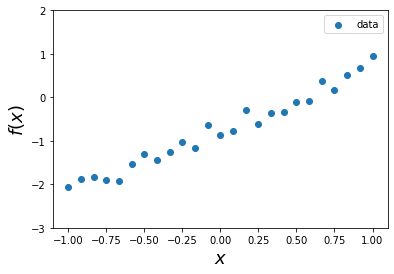

In [95]:
x,y = get_data(25)
plt.scatter(x,y,label='data')
plt.xlabel(r'$x$',fontsize=18)
plt.ylabel(r'$f(x)$',fontsize=18)
plt.ylim(-3.,2.)
plt.legend()
# plt.savefig('Figures/data.png')

# Generate random parameters,
$[m,b] \sim {\cal U}([-2,2])$

In [96]:
#random parameters
def get_random_params(m):
    theta_random = np.random.uniform(low=-2.,high=2.,size=(m,2))
    return theta_random

## Figure per frame

In [97]:
def plot_figure_frame(data,params,i):
    m,b = params
    x,y = data
    f = lambda x,m,b:m*x + b
    
    x_grid = np.linspace(-1., 1., 100)
    y_pred = f(x_grid, m, b)
    
    fig, ax = plt.subplots()
    ax.clear()
    ax.scatter(x, y,label='data')
    ax.plot(x_grid,y_pred,color='k',label='model')
    ax.text(0.2,-2.5,'m=%.2f, b=%.2f'%(m,b),fontsize=15)
    ax.legend(loc=1)
    ax.set_xlabel(r'$x$', fontsize=18)
    ax.set_ylabel(r'$f(x)$', fontsize=18)
    ax.set_ylim(-3., 2.)
    # plt.savefig('Figures/linear_model_%s.png'%(i))


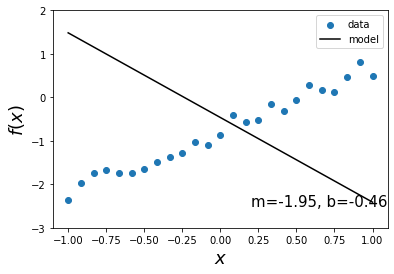

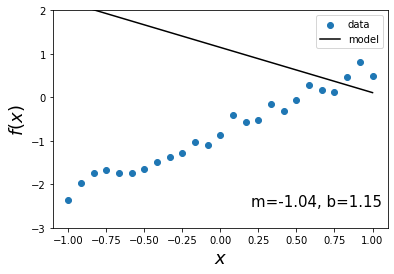

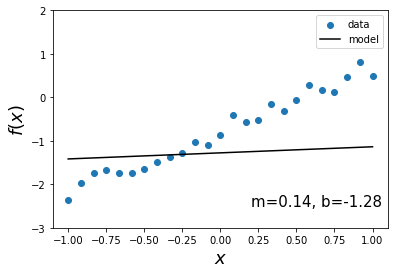

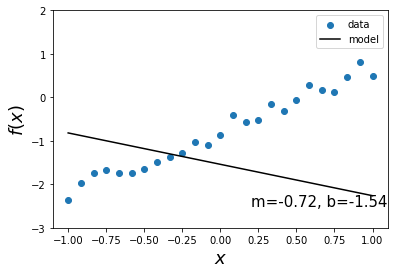

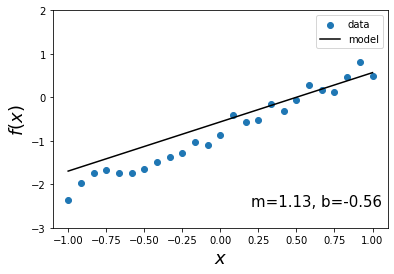

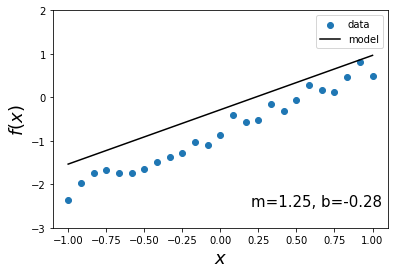

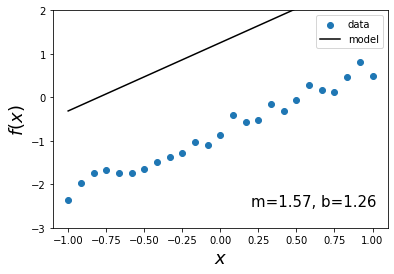

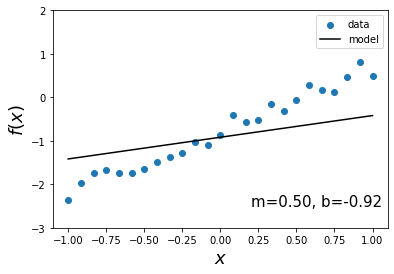

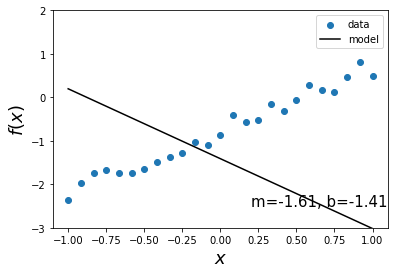

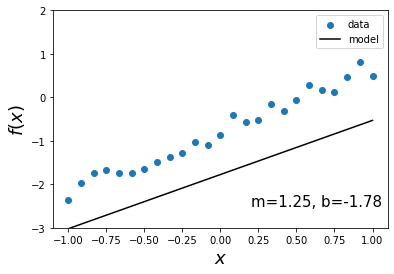

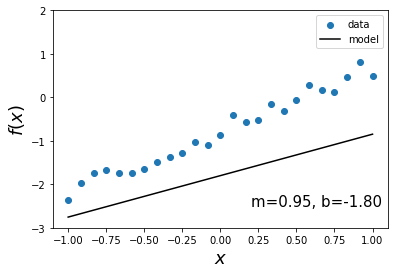

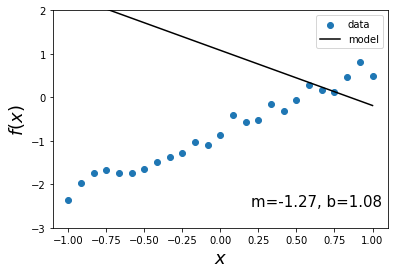

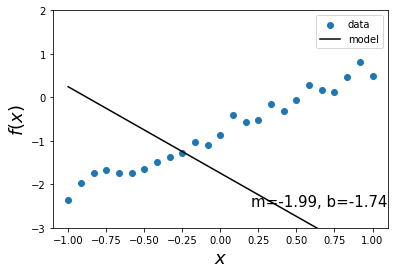

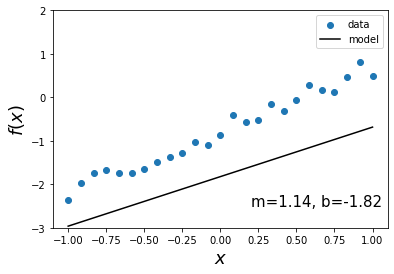

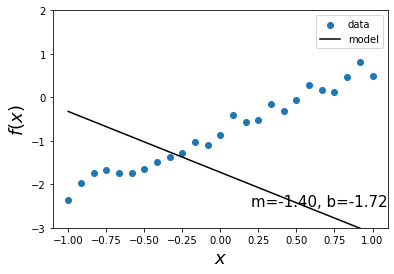

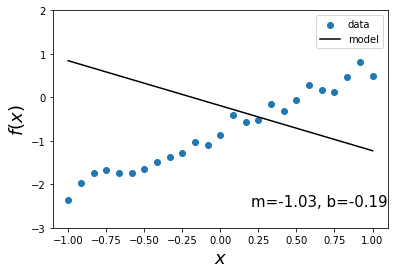

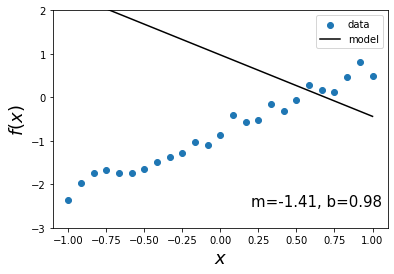

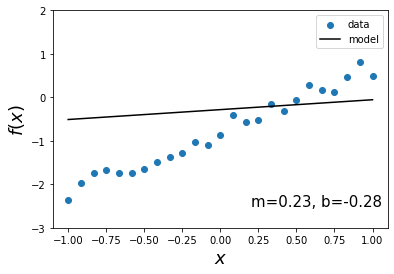

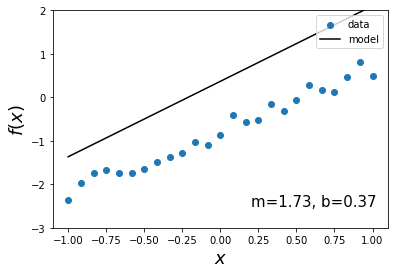

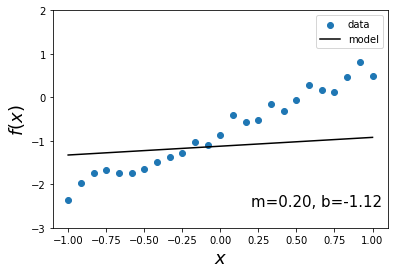

In [98]:
theta_rnd = get_random_params(20)
x, y = get_data(25)
for i, p in enumerate(theta_rnd): 
    plot_figure((x,y),p,i)
    plt.draw()
    plt.pause(0.01)

## Animation

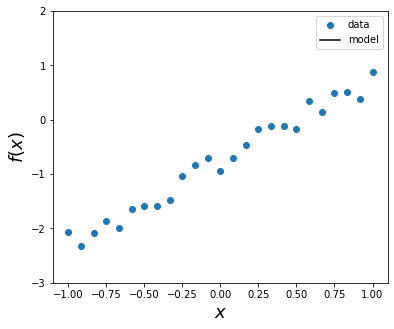

In [99]:
%matplotlib inline

from matplotlib import animation, rc
from IPython.display import HTML

x,y = get_data(25)
theta_rnd = get_random_params(20)

fig, ax = plt.subplots(figsize=(6,5))
# plt.figure(facecolor='white')

ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)
ax.set_ylim(-3., 2.)
ax.set_xlim(-1.1, 1.1)
ax.scatter(x,y,label='data')

# line1, = ax.plot([], [], ms=20, label='data')
line2, = ax.plot([], [], ms=20, color='k', label='model')
txt2 = ax.text(0.2,-2.5, '',fontsize=15)
ax.legend(loc=1)

def drawframe(n):
    params = theta_rnd[n]
    m, b = params
    def f(x, m, b): return m*x + b

    x_grid = np.linspace(-1., 1., 100)
    y_pred = f(x_grid, m, b)
    
    # line1.set_data(x,y)
    line2.set_data(x_grid,y_pred)
    txt2.set_text('m=%.2f, b=%.2f'%(m,b))
    
    return (line2)
    

In [100]:
%matplotlib inline

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(
    fig, drawframe, frames=19, interval=200, blit=False)

# Save as GIF
anim.save('animation.gif')  # writer='pillow'

# play animation
HTML(anim.to_html5_video())


# Polynomials

In [101]:
# polynomial
def poly_pred(data,deg):
    x,y = data
    X = np.column_stack((x,np.ones_like(x)))
    w = np.polyfit(x, y, deg)

    x_grid = np.linspace(-1.,1.,100)
    y_pred = np.polyval(w,x_grid)
    return x_grid,y_pred,w

1 [ 1.38538911 -0.8267469 ]
3 [ 0.10608521 -0.01152219  1.30287839 -0.82162593]
5 [ 0.05342408 -0.63683461  0.03683177  0.66574636  1.3193359  -0.90249382]
7 [ 0.04179055 -3.82626712 -0.01158344  4.96729399  0.06211247 -1.19800215
  1.31727217 -0.82069665]
9 [ 0.03568451 -2.40430203  0.00981635 -0.08624174 -0.02660656  3.51283968
  0.07458751 -1.07927119  1.31610994 -0.82069665]


/var/folders/t5/4s883lqs43gbc9km4ykw_y7w0000gn/T/ipykernel_32969/1581757992.py:5: RankWarning: Polyfit may be poorly conditioned
  x_grid,y_pred,w = poly_pred((x,y),p)
/var/folders/t5/4s883lqs43gbc9km4ykw_y7w0000gn/T/ipykernel_32969/1581757992.py:5: RankWarning: Polyfit may be poorly conditioned
  x_grid,y_pred,w = poly_pred((x,y),p)


Text(0, 0.5, '$f(x)$')

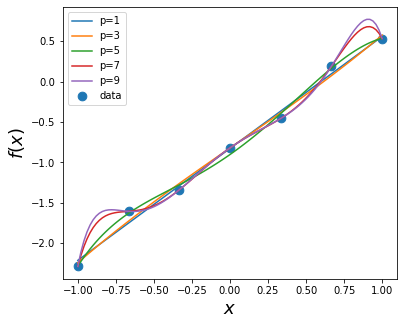

In [102]:
x, y = get_data(7)

fig, ax = plt.subplots(figsize=(6, 5))
for p in range(1,11,2): # loop over different degrees
    x_grid,y_pred,w = poly_pred((x,y),p)
    print(p,w)
    plt.plot(x_grid,y_pred,label='p=%s'%p)
plt.scatter(x,y,s=75,label='data')
plt.legend()
plt.xlabel(r'$x$',fontsize=18)
plt.ylabel(r'$f(x)$',fontsize=18)
# plt.savefig('Figures/polyfit_2.png',dpi=1800)

## Linear models 

For a square function with regularization, the optimal parameters for a linear model are given by,\
$\boldsymbol{\theta}^{*}(\lambda) = \left ( \mathbf{\Phi}(\mathbf{X})^{\top} \mathbf{\Phi}(\mathbf{X})  + \lambda \mathbb{I}\right)^{-1} \mathbf{\Phi}(\mathbf{X})^{\top}\mathbf{y}$

We are gonna use ```PolynomialFeatures``` from ```Sklearn``` to construct the 



In [103]:
from sklearn.preprocessing import PolynomialFeatures

def linear_model_solver(data,deg,l):
    x,y = data
    poly = PolynomialFeatures(deg)
    X = x[np.newaxis].T # resize to (N,d)
    Phi = poly.fit_transform(X)
    Phi = Phi[:,::-1] # reverse column order (xixj, ..., 1)
    Phit_Phi = Phi.T @ Phi
    Phit_y = Phi.T @ y
    
    lambda_I = l*np.eye(Phit_Phi.shape[0]) # regularization
    
    A = Phit_Phi + lambda_I
    A_inv = np.linalg.inv(A)
    w = A_inv @ Phit_y 
    return w

In [109]:
def f_poly(x, w, deg):
    poly = PolynomialFeatures(deg)
    X = x[np.newaxis].T
    Phi = poly.fit_transform(X)
    Phi = Phi[:, ::-1] # reverse column order (xixj, ..., 1)
    y_pred = Phi @ w
    return y_pred

# Example
Let's study the impact of the regularization term.

In [110]:
x,y = get_data(7)
l_ = np.array([0.,1E-4,1E-3,1E-2,1E-1,1.]) # lambda
w_ = []
deg = 7
for l in l_: # loop over variuos lambda 
    w = linear_model_solver((x,y),deg,l)
    w_.append(w) # list of optimal parameters

([<matplotlib.axis.XTick at 0x12b5d7310>,
 [Text(0, 0, '$\\theta_{0}$'),
  Text(1, 0, '$\\theta_{1}$'),
  Text(2, 0, '$\\theta_{2}$'),
  Text(3, 0, '$\\theta_{3}$'),
  Text(4, 0, '$\\theta_{4}$'),
  Text(5, 0, '$\\theta_{5}$'),
  Text(6, 0, '$\\theta_{6}$'),
  Text(7, 0, '$\\theta_{7}$')])

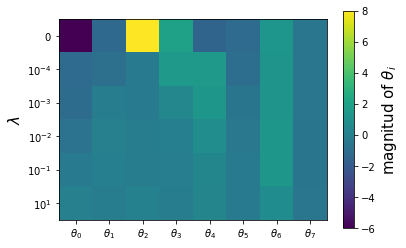

In [111]:
plt.figure(0)
cbar = plt.imshow(w_)
cbar = plt.colorbar(cbar)
cbar.set_label(r'magnitud of $\theta_i$',fontsize=15)
plt.ylabel(r'$\lambda$',fontsize=15)
lambda_ticks = [r'$0$', r'$10^{-4}$', r'$10^{-3}$',
                r'$10^{-2}$', r'$10^{-1}$', r'$10^{1}$']
plt.yticks(np.arange(len(l_)),lambda_ticks)
theta_ticks = [r'$\theta_{%s}$'%i for i in range(len(w_[0]))]
plt.xticks(np.arange(len(w_[0])), theta_ticks,fontsize=10)
# plt.savefig('Figures/polyfit_regularization_params.png',dpi=1800)

Text(0, 0.5, '$f(x)$')

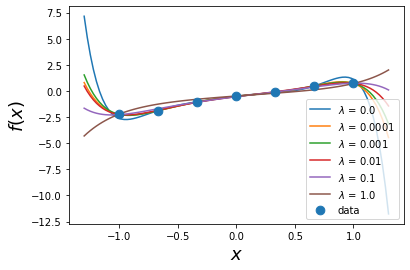

In [112]:
deg = 7
for w,l in zip(w_,l_):
    x_grid = np.linspace(-1.3,1.3,100)
    y_pred = f_poly(x_grid,w,deg)
    plt.plot(x_grid,y_pred,label=r'$\lambda$ = %s'%l)
plt.scatter(x,y,s=75,label='data',zorder=2.5)
plt.legend()
plt.xlabel(r'$x$',fontsize=18)
plt.ylabel(r'$f(x)$',fontsize=18)
# plt.savefig('Figures/polyfit_regularization.png',dpi=1800)

## Coefficient of determination $R^2$
(**homework**)\
$R^{2} = 1-\frac{SS_{res}}{SS_{tot}}$,\
where,\
$SS_{res} = \sum_{i} (y_i - f(x_i))^2$\
$SS_{tot} = \sum_{i} (y_i - \hat{y})^2$\
$\hat{y} = \frac{1}{N}\sum_i^{N} y_i$


In [108]:
# code here
def f_r_square(data,l,deg):
    
    # solve for theta
    
    # compute ss_res 
    
    # compute ss_tot
    
    r2 = # 
    return r2

SyntaxError: invalid syntax (1564491462.py, line 10)